In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import umap
import seaborn as sns
import requests
import time
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

%matplotlib inline
from datetime import datetime
import seaborn as sns

from scipy import stats

In [2]:
##We will only use the categorical features that we curate
string_brackets_columns = ['resoFacts.patioAndPorchFeatures', 'resoFacts.waterSource', 'resoFacts.exteriorFeatures',
                           'resoFacts.interiorFeatures', 'resoFacts.communityFeatures', 'resoFacts.constructionMaterials',
                           'resoFacts.greenEnergyEfficient', 'resoFacts.foundationDetails', 
                           'resoFacts.utilities', 'resoFacts.appliances', 'resoFacts.flooring', 'resoFacts.parkingFeatures',
                           'resoFacts.lotFeatures', 'resoFacts.fireplaceFeatures', 'resoFacts.laundryFeatures', 
                           'resoFacts.propertySubType', 'resoFacts.securityFeatures', 
                           'resoFacts.cooling', 'resoFacts.windowFeatures', 'resoFacts.heating', 'resoFacts.sewer', 
                           'resoFacts.poolFeatures']

string_comma_columns = ['resoFacts.structureType', 'resoFacts.architecturalStyle', 
                        'resoFacts.fencing', 'resoFacts.roofType']

t = string_brackets_columns + string_comma_columns
Selected_features = list(set(t) - set(['resoFacts.utilities', 'resoFacts.propertySubType']))

In [3]:
Month = 'September'
Year = '2022'
main_df = pd.read_csv("C:\\Users\\Khoatruong\\DATA365\\House Capstone Project\\Data cleaning\\Clean_data_House_properties\\" + Month + '_' + Year + '\\houses_properties_' + Month + '.csv')
cols = main_df.columns.tolist()
for c in cols:
    if 'resoFacts.' in c:
        feature = c.split('.')[1]
        main_df[feature] = main_df[c]
        main_df.drop(labels = [c], axis = 1, inplace = True)

##Drop unimportant features 
main_df.drop(labels = ['streetAddress', 'countyId', 'hasCooling', 'hasHeating'], axis = 1, inplace = True)
main_df.reset_index(drop = True, inplace = True)
main_df

,zpid,annualHomeownersInsurance,monthlyHoaFee,livingAreaValue,bedrooms,longitude,latitude,zipcode,city,mortgageRates.fifteenYearFixedRate,...,parking,hasSpa,coveredSpaces,bathrooms,bathroomsHalf,bathroomsFull,hasFireplace,fireplaces,levels,isNewConstruction
0,220116093,756,0.0,748.0,2.0,-97.789510,33.293644,76431,Chico,5.639,...,4,False,4.0,2.0,0.0,2.0,False,0.0,One,False
1,220116230,794,0.0,1425.0,3.0,-97.798600,33.296837,76431,Chico,5.639,...,0,False,0.0,2.0,0.0,2.0,False,0.0,One,False
2,220098008,819,0.0,1416.0,2.0,-97.796005,33.292850,76431,Chico,5.639,...,2,False,2.0,2.0,0.0,2.0,False,0.0,One,False
3,78939206,622,0.0,820.0,2.0,-97.748680,33.210660,76426,Bridgeport,5.639,...,0,False,0.0,1.0,0.0,1.0,False,0.0,One,False
4,78938461,836,0.0,1296.0,4.0,-97.584170,33.239480,76234,Decatur,5.639,...,0,False,0.0,2.0,0.0,2.0,False,0.0,One,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,67640476,5250,0.0,4601.0,4.0,-96.857666,32.228120,76041,Forreston,5.978,...,3,False,3.0,6.0,2.0,4.0,True,1.0,Two,False
12674,117637372,8190,0.0,3659.0,4.0,-97.042015,32.297650,76064,Maypearl,5.978,...,3,True,3.0,4.0,2.0,2.0,True,2.0,One,False
12675,67656170,3776,0.0,2584.0,3.0,-96.832670,32.359640,75165,Waxahachie,5.978,...,0,False,0.0,2.0,0.0,2.0,False,0.0,One,False
12676,67640330,5670,0.0,2826.0,3.0,-96.945750,32.342957,75167,Waxahachie,5.978,...,2,False,2.0,3.0,0.0,3.0,True,1.0,One,False


In [4]:
path_abs = "C:\\Users\\Khoatruong\\DATA365\\House Capstone Project\\Data cleaning\\Houses_categorical_property\\"
for category in Selected_features:
    ft = category.split('.')[1]
    name = 'houses' + '_' + ft + '.csv'
    df_cat = pd.read_csv(path_abs + Month + '_' + Year + '\\' + name)
    main_df = pd.merge(main_df, df_cat, how = 'left', on = 'zpid')

main_df.drop(labels = ['zpid'], axis = 1, inplace = True)
category_list = ['zipcode', 'city', 'county', 'SchoolDistrict', 'isSeniorCommunity', 'hasAssociation', 'hasPrivatePool', 
                 'canRaiseHorses', 'hasGarage', 'hasAttachedGarage', 'hasCarport', 'hasSpa', 'hasFireplace', 
                 'levels', 'isNewConstruction']

numerical_list = ['annualHomeownersInsurance', 'monthlyHoaFee', 'livingAreaValue', 'bedrooms', 'longitude', 'latitude',
                  'mortgageRates.fifteenYearFixedRate', 'mortgageRates.thirtyYearFixedRate', 'mortgageRates.arm5Rate', 
                  'propertyTaxRate', 'price', 'Crime_per_1000', 'carportSpaces', 'garageSpaces', 'parking', 'coveredSpaces',
                  'bathrooms', 'bathroomsHalf', 'bathroomsFull', 'fireplaces']

string_list = ['city', 'county', 'SchoolDistrict', 'levels']
for string in string_list:
    main_df[string] = main_df[string].str.lower()

In [5]:
main_df

,annualHomeownersInsurance,monthlyHoaFee,livingAreaValue,bedrooms,longitude,latitude,zipcode,city,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,...,poolFeatures_inground,poolFeatures_gunite,poolFeatures_private,poolFeatures_other,exteriorFeatures_coveredpatio/porch,exteriorFeatures_storage,exteriorFeatures_raingutters,exteriorFeatures_other,exteriorFeatures_lighting,exteriorFeatures_privateyard
0,756,0.0,748.0,2.0,-97.789510,33.293644,76431,chico,5.639,6.470,...,0,0,0,0,0,0,0,1,0,0
1,794,0.0,1425.0,3.0,-97.798600,33.296837,76431,chico,5.639,6.470,...,0,0,0,0,0,0,0,1,0,0
2,819,0.0,1416.0,2.0,-97.796005,33.292850,76431,chico,5.639,6.470,...,0,0,0,0,1,1,0,0,0,0
3,622,0.0,820.0,2.0,-97.748680,33.210660,76426,bridgeport,5.639,6.470,...,0,0,0,0,1,0,0,0,0,0
4,836,0.0,1296.0,4.0,-97.584170,33.239480,76234,decatur,5.639,6.470,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,5250,0.0,4601.0,4.0,-96.857666,32.228120,76041,forreston,5.978,6.143,...,1,0,1,1,1,0,1,1,0,0
12674,8190,0.0,3659.0,4.0,-97.042015,32.297650,76064,maypearl,5.978,6.143,...,1,0,1,1,0,0,1,1,0,1
12675,3776,0.0,2584.0,3.0,-96.832670,32.359640,75165,waxahachie,5.978,6.143,...,0,0,0,0,0,0,1,0,0,0
12676,5670,0.0,2826.0,3.0,-96.945750,32.342957,75167,waxahachie,5.978,6.143,...,0,0,0,0,1,0,0,0,0,0


In [6]:
##This function will do one hot encoding all the variables
def transform_data(main_df, category_list):
    df_transformed = main_df.copy()
    for cat in category_list:
        all_values = df_transformed[cat].unique()
        if (len(all_values) == 2) and (True in all_values) and (False in all_values):
            df_transformed.loc[df_transformed[cat] == True, cat] = 1
            df_transformed.loc[df_transformed[cat] == False, cat] = 0
        elif len(all_values) > 2:
            new_ft = pd.get_dummies(df_transformed[cat], prefix = cat)
            df_transformed = pd.concat([df_transformed, new_ft], axis = 1)
            df_transformed.drop(labels = [cat], axis = 1, inplace = True)
    
    all_cols = df_transformed.columns.tolist()
    encoded_categories = sorted(set(all_cols) - set(numerical_list))
    n_list = sorted(set(numerical_list) - set(['price']))
    all_features = encoded_categories + n_list
    
    df_transformed = df_transformed[all_features + ['price']]
    ##we want to keep the list of features in order
    return all_features, df_transformed

In [7]:
all_features, df_transformed = transform_data(main_df, category_list)

In [8]:
all_features

['SchoolDistrict_aledo isd',
 'SchoolDistrict_allen isd',
 'SchoolDistrict_alvarado isd',
 'SchoolDistrict_alvord isd',
 'SchoolDistrict_anna isd',
 'SchoolDistrict_argyle isd',
 'SchoolDistrict_arlington isd',
 'SchoolDistrict_aubrey isd',
 'SchoolDistrict_avalon isd',
 'SchoolDistrict_azle isd',
 'SchoolDistrict_birdville isd',
 'SchoolDistrict_bland isd',
 'SchoolDistrict_blue ridge isd',
 'SchoolDistrict_bowie isd',
 'SchoolDistrict_boyd isd',
 'SchoolDistrict_bridgeport isd',
 'SchoolDistrict_brock isd',
 'SchoolDistrict_burleson isd',
 'SchoolDistrict_carroll isd',
 'SchoolDistrict_carrollton-farmers branch isd',
 'SchoolDistrict_castleberry isd',
 'SchoolDistrict_cedar hill isd',
 'SchoolDistrict_celina isd',
 'SchoolDistrict_chico isd',
 'SchoolDistrict_cleburne isd',
 'SchoolDistrict_community isd',
 'SchoolDistrict_coppell isd',
 'SchoolDistrict_crandall isd',
 'SchoolDistrict_crowley isd',
 'SchoolDistrict_dallas isd',
 'SchoolDistrict_decatur isd',
 'SchoolDistrict_denton i

In [9]:
##Here, we separate houses into different groups with different price range
##Drop the price column
##Group 1: $0 - $200k (endpoint is exclusive)
##Group 2: $200k - $400k
##Group 3: $400k - $600k
##Group 4: $600k - $800k
##Group 5: > $800k
df_transformed['price_group'] = 0
df_transformed.loc[(df_transformed['price'] >= 0) & (df_transformed['price'] < 200000), 'price_group'] = '0 to 200k ($)'
df_transformed.loc[(df_transformed['price'] >= 200000) & (df_transformed['price'] < 400000), 'price_group'] = '200k to 400k ($)'
df_transformed.loc[(df_transformed['price'] >= 400000) & (df_transformed['price'] < 600000), 'price_group'] = '400k to 600k ($)'
df_transformed.loc[(df_transformed['price'] >= 600000) & (df_transformed['price'] < 800000), 'price_group'] = '600k to 800k ($)'
df_transformed.loc[(df_transformed['price'] >= 800000), 'price_group'] = '>= 800k ($)'
df_transformed.drop(labels = ['price'], axis = 1, inplace = True)

In [10]:
##scale the transformed data
def scale_data(df_transformed, numerical_list):
    df_scaled = df_transformed.copy()
    for num in numerical_list:
        col = df_scaled[num].to_numpy().reshape(-1, 1)
        scaler = MinMaxScaler()
        col_transformed = scaler.fit_transform(col)
        df_scaled[num] = col_transformed
    return df_scaled

In [11]:
n_list = sorted(set(numerical_list) - set(['price']))
df_scaled = scale_data(df_transformed, n_list)
df_scaled

,SchoolDistrict_aledo isd,SchoolDistrict_allen isd,SchoolDistrict_alvarado isd,SchoolDistrict_alvord isd,SchoolDistrict_anna isd,SchoolDistrict_argyle isd,SchoolDistrict_arlington isd,SchoolDistrict_aubrey isd,SchoolDistrict_avalon isd,SchoolDistrict_azle isd,...,latitude,livingAreaValue,longitude,monthlyHoaFee,mortgageRates.arm5Rate,mortgageRates.fifteenYearFixedRate,mortgageRates.thirtyYearFixedRate,parking,propertyTaxRate,price_group
0,0,0,0,0,0,0,0,0,0,0,...,0.894944,0.033448,0.134856,0.0,0.220859,0.350909,0.982456,0.173913,0.268908,0 to 200k ($)
1,0,0,0,0,0,0,0,0,0,0,...,0.897364,0.091810,0.130265,0.0,0.220859,0.350909,0.982456,0.000000,0.268908,0 to 200k ($)
2,0,0,0,0,0,0,0,0,0,0,...,0.894343,0.091034,0.131575,0.0,0.220859,0.350909,0.982456,0.086957,0.268908,0 to 200k ($)
3,0,0,0,0,0,0,0,0,0,0,...,0.832067,0.039655,0.155477,0.0,0.220859,0.350909,0.982456,0.000000,0.268908,0 to 200k ($)
4,0,0,0,0,0,0,0,0,0,0,...,0.853904,0.080690,0.238564,0.0,0.220859,0.350909,0.982456,0.000000,0.268908,0 to 200k ($)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,0,0,0,0,0,0,0,0,0,0,...,0.087587,0.365603,0.605491,0.0,0.500000,0.967273,0.026316,0.130435,0.596639,>= 800k ($)
12674,0,0,0,0,0,0,0,0,0,0,...,0.140270,0.284397,0.512384,0.0,0.500000,0.967273,0.026316,0.130435,0.596639,>= 800k ($)
12675,0,0,0,0,0,0,0,0,0,0,...,0.187241,0.191724,0.618115,0.0,0.500000,0.967273,0.026316,0.000000,0.596639,>= 800k ($)
12676,0,0,0,0,0,0,0,0,0,0,...,0.174600,0.212586,0.561003,0.0,0.500000,0.967273,0.026316,0.086957,0.596639,>= 800k ($)


In [12]:
columns = df_scaled.columns.tolist()
for col in columns:
    print("Null in "+ col + ": {}".format(df_scaled[col].isnull().sum()))

Null in SchoolDistrict_aledo isd: 0
Null in SchoolDistrict_allen isd: 0
Null in SchoolDistrict_alvarado isd: 0
Null in SchoolDistrict_alvord isd: 0
Null in SchoolDistrict_anna isd: 0
Null in SchoolDistrict_argyle isd: 0
Null in SchoolDistrict_arlington isd: 0
Null in SchoolDistrict_aubrey isd: 0
Null in SchoolDistrict_avalon isd: 0
Null in SchoolDistrict_azle isd: 0
Null in SchoolDistrict_birdville isd: 0
Null in SchoolDistrict_bland isd: 0
Null in SchoolDistrict_blue ridge isd: 0
Null in SchoolDistrict_bowie isd: 0
Null in SchoolDistrict_boyd isd: 0
Null in SchoolDistrict_bridgeport isd: 0
Null in SchoolDistrict_brock isd: 0
Null in SchoolDistrict_burleson isd: 0
Null in SchoolDistrict_carroll isd: 0
Null in SchoolDistrict_carrollton-farmers branch isd: 0
Null in SchoolDistrict_castleberry isd: 0
Null in SchoolDistrict_cedar hill isd: 0
Null in SchoolDistrict_celina isd: 0
Null in SchoolDistrict_chico isd: 0
Null in SchoolDistrict_cleburne isd: 0
Null in SchoolDistrict_community isd: 

Null in zipcode_75173: 0
Null in zipcode_75180: 0
Null in zipcode_75181: 0
Null in zipcode_75182: 0
Null in zipcode_75189: 0
Null in zipcode_75201: 0
Null in zipcode_75203: 0
Null in zipcode_75204: 0
Null in zipcode_75205: 0
Null in zipcode_75206: 0
Null in zipcode_75208: 0
Null in zipcode_75209: 0
Null in zipcode_75210: 0
Null in zipcode_75211: 0
Null in zipcode_75212: 0
Null in zipcode_75214: 0
Null in zipcode_75215: 0
Null in zipcode_75216: 0
Null in zipcode_75217: 0
Null in zipcode_75218: 0
Null in zipcode_75219: 0
Null in zipcode_75220: 0
Null in zipcode_75223: 0
Null in zipcode_75224: 0
Null in zipcode_75225: 0
Null in zipcode_75226: 0
Null in zipcode_75227: 0
Null in zipcode_75228: 0
Null in zipcode_75229: 0
Null in zipcode_75230: 0
Null in zipcode_75231: 0
Null in zipcode_75232: 0
Null in zipcode_75233: 0
Null in zipcode_75234: 0
Null in zipcode_75235: 0
Null in zipcode_75236: 0
Null in zipcode_75237: 0
Null in zipcode_75238: 0
Null in zipcode_75240: 0
Null in zipcode_75241: 0


In [13]:
X = df_scaled.iloc[:, :-1].to_numpy()
y = df_scaled.iloc[:, -1].to_numpy()

# TSNE

### 2D

In [14]:
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)
projections = tsne.fit_transform(X)
proj_df_2D = pd.DataFrame(data = projections, columns = ['x1', 'x2'])
proj_df_2D['price_group'] = y
proj_df_2D

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


,x1,x2,price_group
0,54.857510,-1.838275,0 to 200k ($)
1,54.645943,-2.610254,0 to 200k ($)
2,54.905342,-1.877338,0 to 200k ($)
3,52.279339,-4.772521,0 to 200k ($)
4,55.112888,-8.236233,0 to 200k ($)
...,...,...,...
12673,-15.049583,16.426502,>= 800k ($)
12674,3.793428,-50.606747,>= 800k ($)
12675,16.532833,17.558250,>= 800k ($)
12676,-8.497816,22.017025,>= 800k ($)


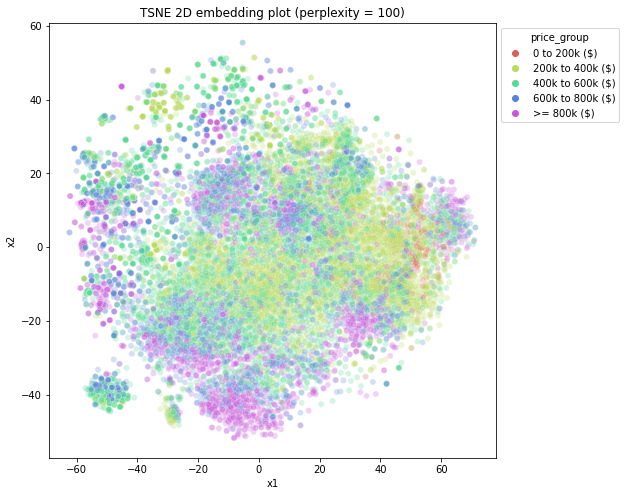

In [15]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("TSNE 2D embedding plot (perplexity = 100)")
plt.show()

### 3D

In [16]:
y = df_scaled.iloc[:, -1].to_numpy()
tsne = TSNE(n_components = 3, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)
projections = tsne.fit_transform(X)
proj_df_3D = pd.DataFrame(data = projections, columns = ['x1', 'x2', 'x3'])
proj_df_3D['price_group'] = y
proj_df_3D

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


,x1,x2,x3,price_group
0,1.222234,-28.748035,-35.176418,0 to 200k ($)
1,3.168602,-27.655809,-35.747738,0 to 200k ($)
2,1.130172,-30.321583,-35.275314,0 to 200k ($)
3,4.332809,-36.030090,-22.366695,0 to 200k ($)
4,5.806849,-26.753191,-39.907005,0 to 200k ($)
...,...,...,...,...
12673,-27.671438,33.157448,-6.400949,>= 800k ($)
12674,-19.791834,34.637867,-16.067102,>= 800k ($)
12675,-4.838751,-17.383974,-3.385964,>= 800k ($)
12676,-16.522844,-15.421444,-4.619461,>= 800k ($)


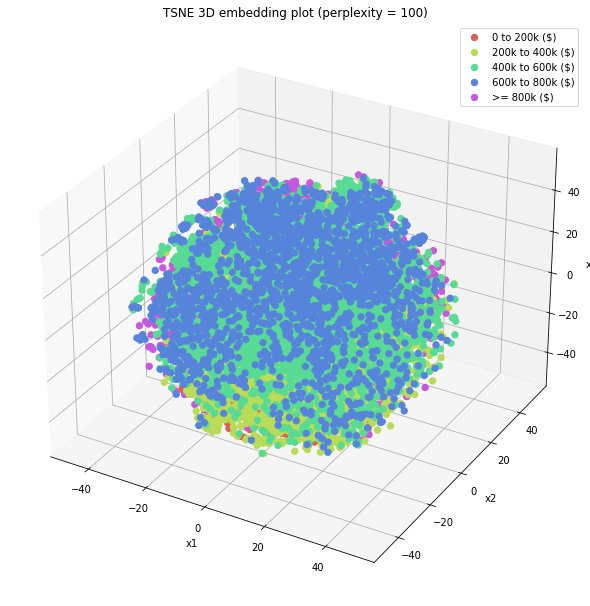

In [17]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("TSNE 3D embedding plot (perplexity = 100)")
plt.show()

## PCA

### 2D

In [18]:
y = df_scaled.iloc[:, -1].to_numpy()
pca = PCA(n_components = 2, random_state = 0)
projections = pca.fit_transform(X)
proj_df_2D = pd.DataFrame(data = projections, columns = ['x1', 'x2'])
proj_df_2D['price_group'] = y
proj_df_2D

,x1,x2,price_group
0,-3.230631,0.444102,0 to 200k ($)
1,-2.574658,0.248849,0 to 200k ($)
2,-1.863423,0.104788,0 to 200k ($)
3,-2.802214,0.477068,0 to 200k ($)
4,-0.893590,0.552057,0 to 200k ($)
...,...,...,...
12673,0.961361,2.840262,>= 800k ($)
12674,1.418744,3.590263,>= 800k ($)
12675,-0.781783,1.157326,>= 800k ($)
12676,-0.760531,0.643419,>= 800k ($)


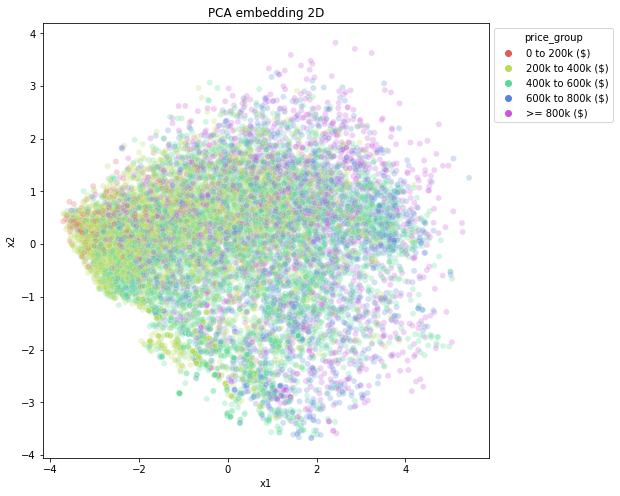

In [19]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("PCA embedding 2D")
plt.show()

### 3D

In [20]:
y = df_scaled.iloc[:, -1].to_numpy()
pca = PCA(n_components = 3, random_state = 0)
projections = pca.fit_transform(X)
proj_df_3D = pd.DataFrame(data = projections, columns = ['x1', 'x2', 'x3'])
proj_df_3D['price_group'] = y
proj_df_3D

,x1,x2,x3,price_group
0,-3.230631,0.444195,-0.722251,0 to 200k ($)
1,-2.574658,0.248900,-1.118660,0 to 200k ($)
2,-1.863423,0.104897,-1.043276,0 to 200k ($)
3,-2.802214,0.477120,-0.791196,0 to 200k ($)
4,-0.893590,0.552008,-1.914113,0 to 200k ($)
...,...,...,...,...
12673,0.961361,2.840243,0.685352,>= 800k ($)
12674,1.418744,3.590324,0.770556,>= 800k ($)
12675,-0.781783,1.157328,-0.831263,>= 800k ($)
12676,-0.760531,0.643398,-0.116324,>= 800k ($)


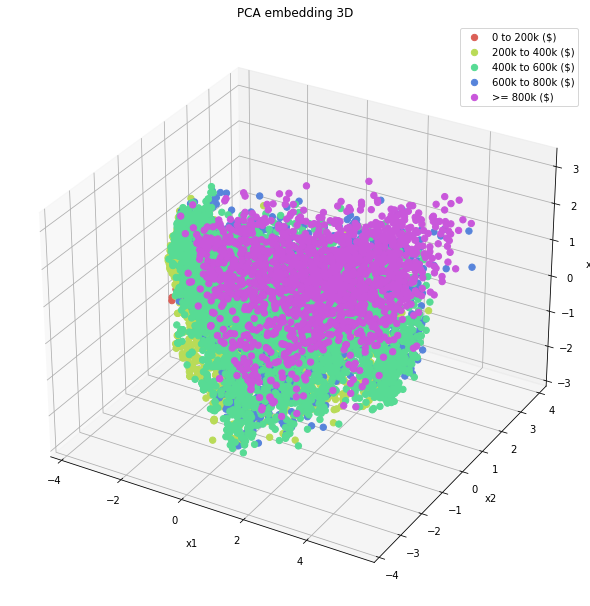

In [21]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("PCA embedding 3D")
plt.show()

## Umap

### 2D

In [22]:
y = df_scaled.iloc[:, -1].to_numpy()
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
projections = umap_2d.fit_transform(X)
proj_df_2D = pd.DataFrame(data = projections, columns = ['x1', 'x2'])
proj_df_2D['price_group'] = y
proj_df_2D

,x1,x2,price_group
0,6.304032,0.189771,0 to 200k ($)
1,6.171758,0.307029,0 to 200k ($)
2,6.064466,0.173880,0 to 200k ($)
3,5.575964,-0.315952,0 to 200k ($)
4,5.519039,0.182812,0 to 200k ($)
...,...,...,...
12673,8.197772,2.553538,>= 800k ($)
12674,7.774017,2.600683,>= 800k ($)
12675,7.032013,2.803189,>= 800k ($)
12676,8.164530,1.999333,>= 800k ($)


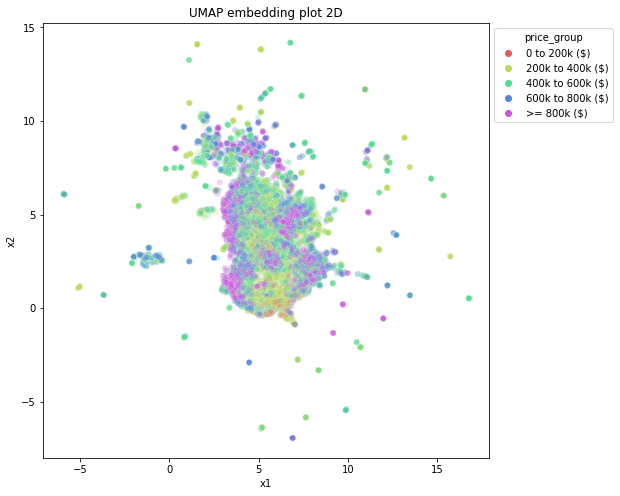

In [23]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("UMAP embedding plot 2D")
plt.show()

### 3D

In [24]:
y = df_scaled.iloc[:, -1].to_numpy()
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)
projections = umap_3d.fit_transform(X)
proj_df_3D = pd.DataFrame(data = projections, columns = ['x1', 'x2', 'x3'])
proj_df_3D['price_group'] = y
proj_df_3D

,x1,x2,x3,price_group
0,1.557156,6.929538,0.623702,0 to 200k ($)
1,1.594724,6.745291,0.755637,0 to 200k ($)
2,1.485678,6.806167,0.519704,0 to 200k ($)
3,1.458172,6.503274,-0.067515,0 to 200k ($)
4,1.871266,6.293205,0.507847,0 to 200k ($)
...,...,...,...,...
12673,3.309519,7.554414,2.830769,>= 800k ($)
12674,3.270710,7.254011,2.653102,>= 800k ($)
12675,2.025045,6.915725,2.876955,>= 800k ($)
12676,2.576114,7.894763,2.674006,>= 800k ($)


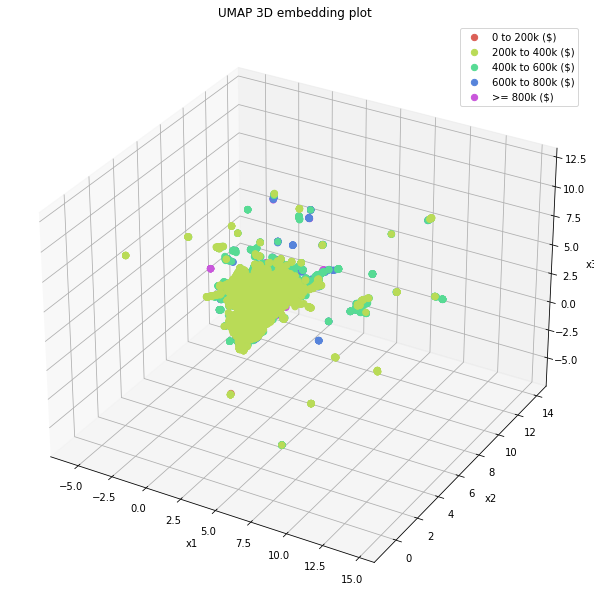

In [25]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("UMAP 3D embedding plot")
plt.show()

## Spectral Embedding

### 2D

#### Affinity = nearest neighbors

In [26]:
y = df_scaled.iloc[:, -1].to_numpy()
spectral_2d_nn = SpectralEmbedding(n_components=2, affinity = 'nearest_neighbors', random_state=0)
projections = spectral_2d_nn.fit_transform(X)
proj_df_2D = pd.DataFrame(data = projections, columns = ['x1', 'x2'])
proj_df_2D['price_group'] = y
proj_df_2D

,x1,x2,price_group
0,-0.000388,-0.000103,0 to 200k ($)
1,-0.000327,-0.000109,0 to 200k ($)
2,-0.000332,-0.000089,0 to 200k ($)
3,-0.000396,-0.000115,0 to 200k ($)
4,-0.000270,-0.000120,0 to 200k ($)
...,...,...,...
12673,-0.000005,-0.000239,>= 800k ($)
12674,0.000040,-0.000331,>= 800k ($)
12675,-0.000192,-0.000077,>= 800k ($)
12676,-0.000186,-0.000038,>= 800k ($)


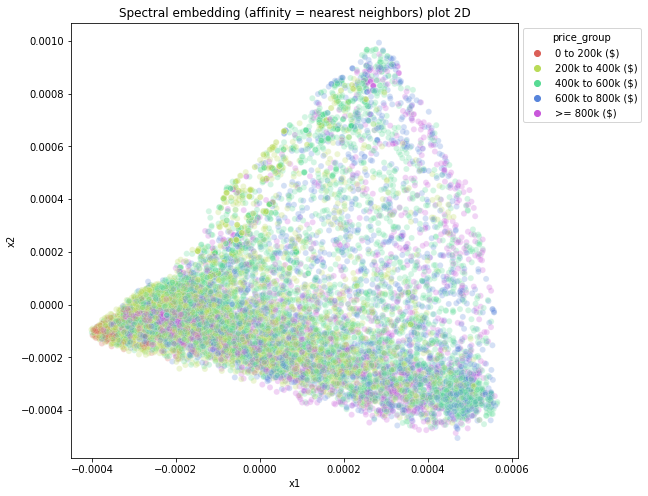

In [27]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("Spectral embedding (affinity = nearest neighbors) plot 2D")
plt.show()

#### Affinity = rbf

In [28]:
y = df_scaled.iloc[:, -1].to_numpy()
spectral_2d_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf', random_state=0)
projections = spectral_2d_rbf.fit_transform(X)
proj_df_2D = pd.DataFrame(data = projections, columns = ['x1', 'x2'])
proj_df_2D['price_group'] = y
proj_df_2D

,x1,x2,price_group
0,-0.000135,0.000031,0 to 200k ($)
1,-0.000108,0.000018,0 to 200k ($)
2,-0.000078,0.000008,0 to 200k ($)
3,-0.000117,0.000034,0 to 200k ($)
4,-0.000037,0.000039,0 to 200k ($)
...,...,...,...
12673,0.000041,0.000196,>= 800k ($)
12674,0.000060,0.000248,>= 800k ($)
12675,-0.000032,0.000080,>= 800k ($)
12676,-0.000031,0.000044,>= 800k ($)


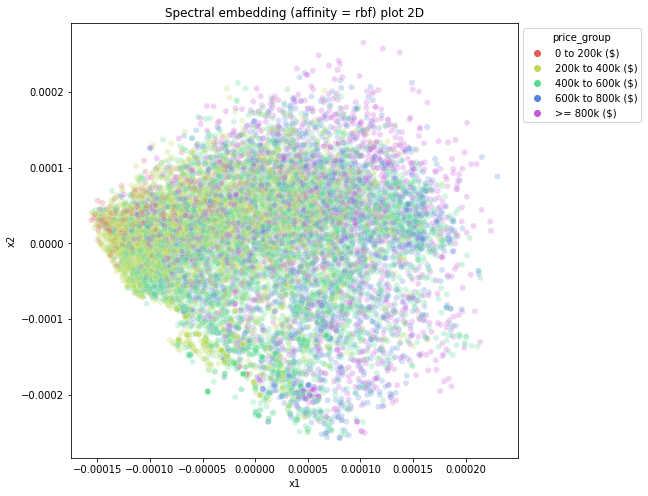

In [29]:
##radial basis function
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("Spectral embedding (affinity = rbf) plot 2D")
plt.show()

### 3D

In [30]:
##Since nearest neighbors take too long, we will just stick with rbf instead
y = df_scaled.iloc[:, -1].to_numpy()
spectral_3d_rbf = SpectralEmbedding(n_components=3, affinity = 'rbf', random_state=0)
projections = spectral_3d_rbf.fit_transform(X)
proj_df_3D = pd.DataFrame(data = projections, columns = ['x1', 'x2', 'x3'])
proj_df_3D['price_group'] = y
proj_df_3D

,x1,x2,x3,price_group
0,-0.000135,0.000031,-0.000061,0 to 200k ($)
1,-0.000108,0.000018,-0.000094,0 to 200k ($)
2,-0.000078,0.000008,-0.000088,0 to 200k ($)
3,-0.000117,0.000034,-0.000068,0 to 200k ($)
4,-0.000037,0.000039,-0.000161,0 to 200k ($)
...,...,...,...,...
12673,0.000041,0.000196,0.000055,>= 800k ($)
12674,0.000060,0.000248,0.000062,>= 800k ($)
12675,-0.000032,0.000080,-0.000070,>= 800k ($)
12676,-0.000031,0.000044,-0.000013,>= 800k ($)


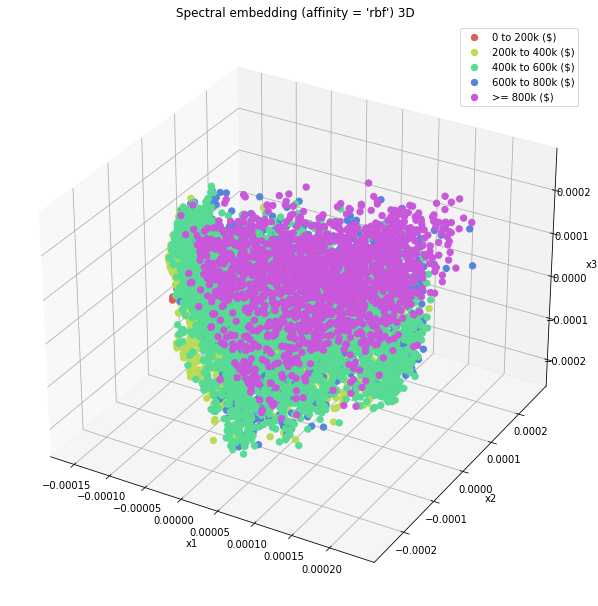

In [31]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    y = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    z = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x, y, z, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("Spectral embedding (affinity = 'rbf') 3D")
plt.show()

In [32]:
##Umap, Spectral Embedding, TSNE, etc. are manifold learning, non-linear dimension reduction algo
##PCA, FA, etc. are linear dimension reduction


## Should we remove some features first?

In [33]:
#Based on these plots, the reason it looks too tight maybe due to many categorical features
##remove some categorical features that the variance is small maybe helpful

In [34]:
X.shape

(12678, 794)

In [35]:
all_features.copy()

['SchoolDistrict_aledo isd',
 'SchoolDistrict_allen isd',
 'SchoolDistrict_alvarado isd',
 'SchoolDistrict_alvord isd',
 'SchoolDistrict_anna isd',
 'SchoolDistrict_argyle isd',
 'SchoolDistrict_arlington isd',
 'SchoolDistrict_aubrey isd',
 'SchoolDistrict_avalon isd',
 'SchoolDistrict_azle isd',
 'SchoolDistrict_birdville isd',
 'SchoolDistrict_bland isd',
 'SchoolDistrict_blue ridge isd',
 'SchoolDistrict_bowie isd',
 'SchoolDistrict_boyd isd',
 'SchoolDistrict_bridgeport isd',
 'SchoolDistrict_brock isd',
 'SchoolDistrict_burleson isd',
 'SchoolDistrict_carroll isd',
 'SchoolDistrict_carrollton-farmers branch isd',
 'SchoolDistrict_castleberry isd',
 'SchoolDistrict_cedar hill isd',
 'SchoolDistrict_celina isd',
 'SchoolDistrict_chico isd',
 'SchoolDistrict_cleburne isd',
 'SchoolDistrict_community isd',
 'SchoolDistrict_coppell isd',
 'SchoolDistrict_crandall isd',
 'SchoolDistrict_crowley isd',
 'SchoolDistrict_dallas isd',
 'SchoolDistrict_decatur isd',
 'SchoolDistrict_denton i

In [36]:
##What if latitude and longitude are already good enough for location?
remove_features = ['SchoolDistrict', 'city', 'appliances', 'architecturalStyle', 'canRaiseHorses', 'greenEnergyEfficient', 
                   'isNewConstruction', 'county', 'laundryFeatures', 'sewer', 'structureType', 'waterSource', 
                   'windowFeatures', 'zipcode']
new_features = all_features.copy()
for ft1 in remove_features:
    for ft2 in new_features[:]:
        if ft1 in ft2:
            new_features.remove(ft2)

In [37]:
X_new = df_scaled[new_features].to_numpy()

In [38]:
X_new

array([[0, 0, 0, ..., 0.9824561403508767, 0.17391304347826086,
        0.26890756302521024],
       [0, 0, 0, ..., 0.9824561403508767, 0.0, 0.26890756302521024],
       [0, 0, 0, ..., 0.9824561403508767, 0.08695652173913043,
        0.26890756302521024],
       ...,
       [0, 0, 0, ..., 0.02631578947368496, 0.0, 0.596638655462185],
       [0, 0, 0, ..., 0.02631578947368496, 0.08695652173913043,
        0.596638655462185],
       [0, 0, 0, ..., 0.02631578947368496, 0.08695652173913043,
        0.596638655462185]], dtype=object)

In [39]:
target = df_scaled.iloc[:, -1].to_numpy()
target

array(['0 to 200k ($)', '0 to 200k ($)', '0 to 200k ($)', ...,
       '>= 800k ($)', '>= 800k ($)', '>= 800k ($)'], dtype=object)

In [40]:
def embedding_data(X, target, technique, n_dimensions):
    projections = technique.fit_transform(X)
    dims = list()
    for i in range(n_dimensions):
        dims.append('x' + str(i+1))
    proj_df = pd.DataFrame(data = projections, columns = dims)
    return proj_df

In [41]:
tsne_2d = TSNE(n_components = 2, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)
tsne_3d = TSNE(n_components = 3, perplexity = 100, random_state = 0, learning_rate = 'auto', n_iter = 1200)

pca_2d = PCA(n_components = 2, random_state = 0)
pca_3d = PCA(n_components = 3, random_state = 0)

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

spectral_2d_rbf = SpectralEmbedding(n_components=2, affinity = 'rbf', random_state=0)
spectral_3d_rbf = SpectralEmbedding(n_components=3, affinity = 'rbf', random_state=0)

#### TSNE with removed features

In [42]:
proj_df_2D = embedding_data(X_new, target, tsne_2d, 2)
proj_df_2D['price_group'] = target

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


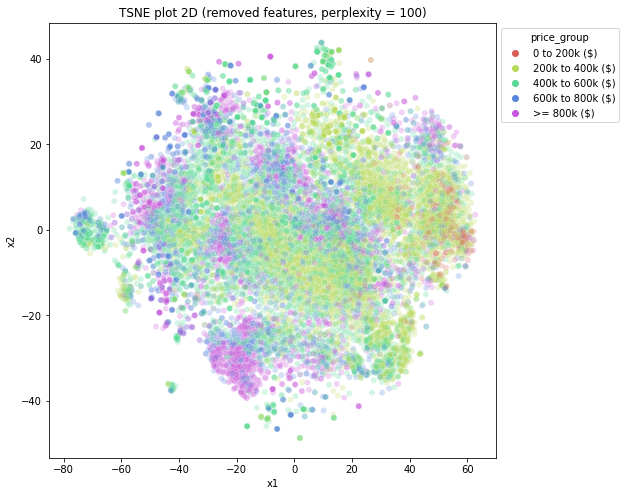

In [44]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("TSNE plot 2D (removed features, perplexity = 100)")
plt.show()

In [45]:
proj_df_3D = embedding_data(X_new, target, tsne_3d, 3)
proj_df_3D['price_group'] = target

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


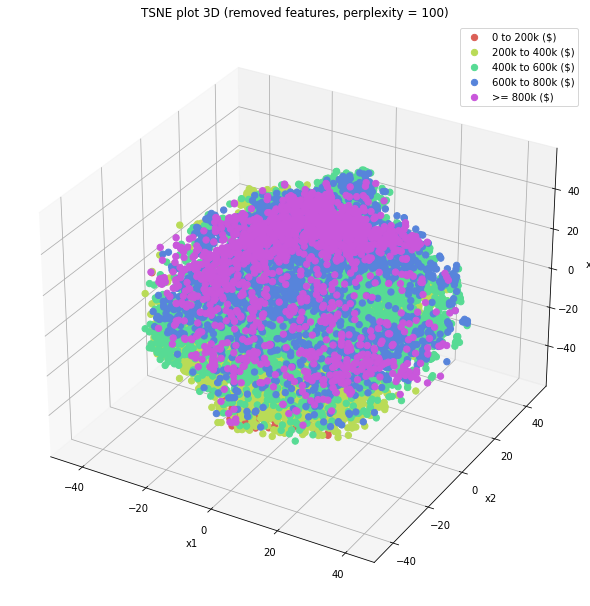

In [46]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("TSNE plot 3D (removed features, perplexity = 100)")
plt.show()

#### PCA with removed features

In [47]:
proj_df_2D = embedding_data(X_new, target, pca_2d, 2)
proj_df_2D['price_group'] = target

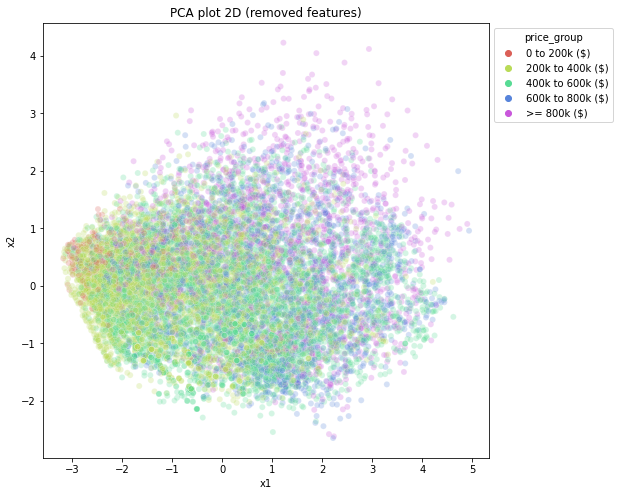

In [48]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("PCA plot 2D (removed features)")
plt.show()

In [49]:
proj_df_3D = embedding_data(X_new, target, pca_3d, 3)
proj_df_3D['price_group'] = target

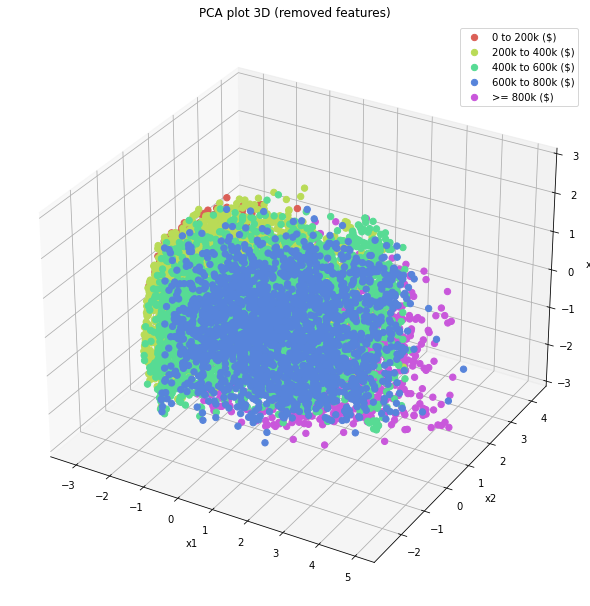

In [50]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("PCA plot 3D (removed features)")
plt.show()

#### Umap with removed features

In [51]:
proj_df_2D = embedding_data(X_new, target, umap_2d, 2)
proj_df_2D['price_group'] = target

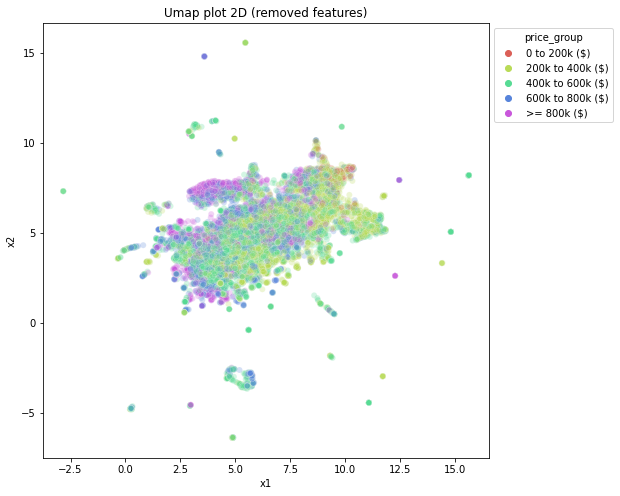

In [52]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("Umap plot 2D (removed features)")
plt.show()

In [53]:
proj_df_3D = embedding_data(X_new, target, umap_3d, 3)
proj_df_3D['price_group'] = target

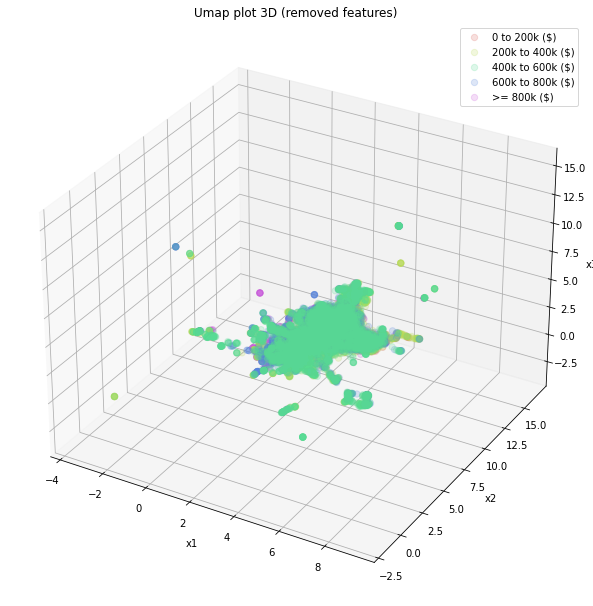

In [54]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 0.2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("Umap plot 3D (removed features)")
plt.show()

#### Spectral embedding

In [55]:
proj_df_2D = embedding_data(X_new, target, spectral_2d_rbf, 2)
proj_df_2D['price_group'] = target

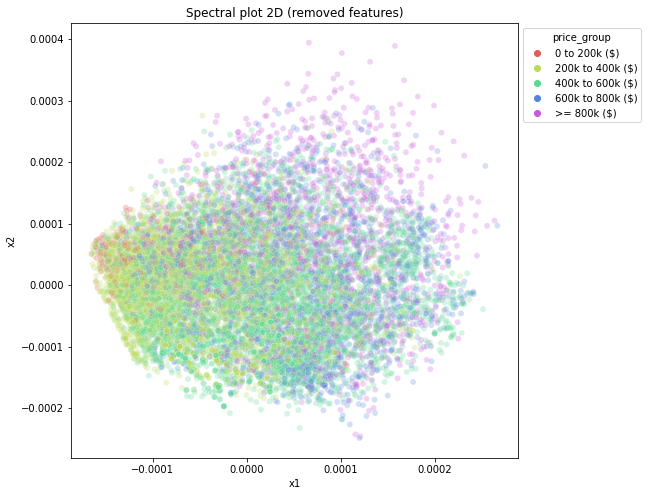

In [56]:
n = len(proj_df_2D.price_group.unique())
plt.figure(figsize = (8, 8))
ax= sns.scatterplot(x = 'x1', y = 'x2', hue = 'price_group', 
                    palette = sns.color_palette("hls", n), data = proj_df_2D,
                    legend = 'full', alpha = 0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.title("Spectral plot 2D (removed features)")
plt.show()

In [57]:
proj_df_3D = embedding_data(X_new, target, spectral_3d_rbf, 3)
proj_df_3D['price_group'] = target

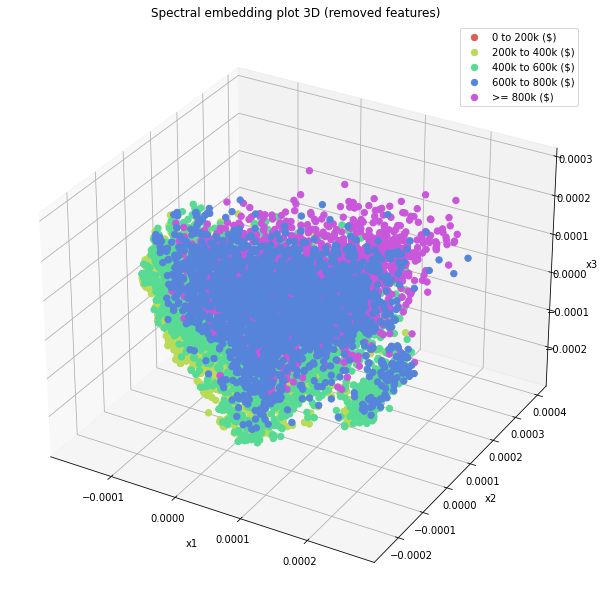

In [58]:
n = len(proj_df_3D.price_group.unique())
groups = proj_df_3D.price_group.unique()
cmap = ListedColormap(sns.color_palette("hls", n).as_hex())
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

for i in range(n):
    x1 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x1']
    x2 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x2']
    x3 = proj_df_3D.loc[proj_df_3D['price_group'] == groups[i]]['x3']
    sc = ax.scatter(x1, x2, x3, label = groups[i], s= 40, marker = 'o', color = color_list[i], alpha = 1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(1, 1))
plt.title("Spectral embedding plot 3D (removed features)")
plt.show()

In [59]:
##It does look more improved but how sure are we?
##Create a new notebook, plot comparasive side by side plots.